# Customer Personality Analysis 

### Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

### Used the KMeans clustering algorithm to segment customers into different groups 

# Acknowledgement

### Link to the dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download

In [49]:
# Load the necessary libraries
import pandas as pd

# Load the necessary dataset
df = pd.read_csv(r'C:\Users\PJ\Downloads\marketing_campaign.csv', delimiter='\t')

# Data Exploration
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types
print('\nData types of the columns:')
print(df.dtypes)

Shape of the dataset: (2240, 29)

Data types of the columns:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


## Generate the names of the columns using the columns attribute.

In [51]:
for col in df.columns:
    print(col)

ID
Year_Birth
Education
Marital_Status
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


## Use describe function to generate the statistical summary of the dataframe

In [52]:
#find missing value
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
#since its a large set using this method will help you know if your initial output is correct
#it gives the count value of the missing value

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [54]:
#Since The dataset has 24 missing values in the "Income" column, I need to fill the missing values with the median of the column

# Fill missing values with the median of the column
df['Income'] = df['Income'].fillna(df['Income'].median())

# Check for missing values again
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [55]:
# Summary statistics of the numerical columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Initial Data Visualization to better understand the data

### visualizing the distribution of the "Income" column using a histogram.

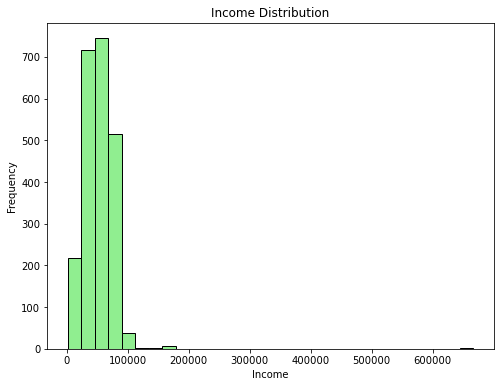

In [56]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Income' column
plt.figure(figsize=(8, 6))
plt.hist(df['Income'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#### The histogram shows that the majority of customers have an income in the range of around 20,000 to 80,000. There are also a few customers with a very high income, which are visible as outliers on the right side of the histogram.

## visualize the distribution of the "Education" column using a bar plot

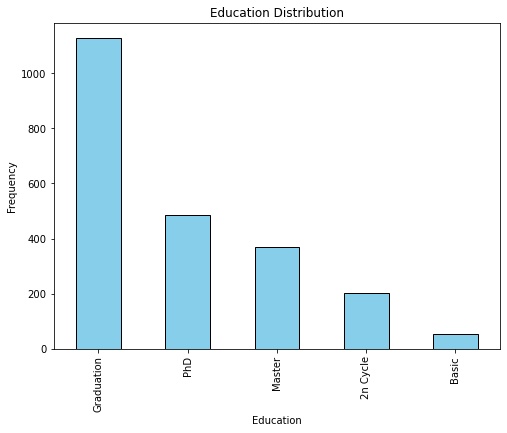

In [57]:
# Plot a bar plot of the 'Education' column
plt.figure(figsize=(8, 6))
df['Education'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

### Before apply popular choice for customer segmentation tasks, K-Means clustering algorithm, the data need to be preprocessed

#### This includes encoding categorical variables and scaling numerical variables.

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
df_encoded = df.copy()

# Initialize a label encoder
le = LabelEncoder()

# Encode the 'Education' column
df_encoded['Education'] = le.fit_transform(df_encoded['Education'])

# Encode the 'Marital_Status' column
df_encoded['Marital_Status'] = le.fit_transform(df_encoded['Marital_Status'])

# Display the first 5 rows of the encoded dataframe
df_encoded.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### 'Dt_Customer' column contains date values, which cannot be scaled. We need to convert this column to a numerical format before scaling.

In [59]:
from datetime import datetime

# Convert 'Dt_Customer' to datetime
df_encoded['Dt_Customer'] = pd.to_datetime(df_encoded['Dt_Customer'])

# Convert 'Dt_Customer' to the number of days since the earliest date
df_encoded['Dt_Customer'] = (df_encoded['Dt_Customer'] - df_encoded['Dt_Customer'].min()).dt.days

# Display the first 5 rows of the dataframe
df_encoded.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,92,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,938,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,591,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,998,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,742,94,173,...,5,0,0,0,0,0,0,3,11,0


In [60]:
from sklearn.preprocessing import StandardScaler

# Initialize a standard scaler
scaler = StandardScaler()

# Scale the numerical columns
df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded[df_encoded.columns])

# Display the first 5 rows of the scaled dataframe
df_encoded.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.020999,-0.985345,-0.350141,0.251004,0.235696,-0.825218,-0.929894,-1.976745,0.307039,0.983781,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.053058,-1.235733,-0.350141,0.251004,-0.235454,1.032559,0.906934,1.667011,-0.383664,-0.870479,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.447070,-0.317643,-0.350141,1.180340,0.773999,-0.825218,-0.929894,0.172468,-0.798086,0.362723,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.181716,1.268149,-0.350141,1.180340,-1.022355,1.032559,-0.929894,1.925433,-0.798086,-0.870479,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,-0.082614,1.017761,1.428354,-0.678332,0.241888,1.032559,-0.929894,0.822831,1.550305,-0.389085,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


## use the model to assign each customer to a cluster.

In [61]:
from sklearn.cluster import KMeans

# Initialize a KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(df_encoded)

KMeans(n_clusters=3, random_state=42)

In [62]:
# Assign each customer to a cluster
df['Cluster'] = kmeans.labels_

# Display the first 5 rows of the dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1


In [63]:
# I can now calculate the average income and recency for each cluster
df.groupby('Cluster')[['Income', 'Recency']].mean()

,Income,Recency
Cluster,,
0,77508.798561,49.676259
1,35125.804035,49.321806
2,58090.530327,48.275272


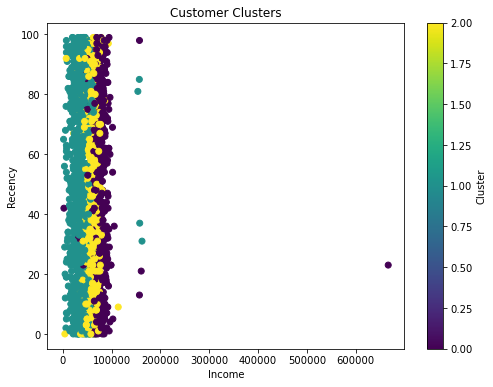

In [64]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Recency'], c=df['Cluster'])
plt.title('Customer Clusters')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.colorbar(label='Cluster')
plt.show()

#### This indicates that:

- Customers in Cluster 0 have the highest average income and a medium average recency.
- Customers in Cluster 1 have the lowest average income and a slightly higher average recency.
- Customers in Cluster 2 have a medium average income and the lowest average recency.

This information can be used to tailor marketing strategies for each customer segment. For example, customers in Cluster 0 might be more interested in premium products, while customers in Cluster 1 might be more responsive to discounts and promotions.

## Overview of the average values of all columns for each cluster:

In [65]:
# Calculate the average values of all columns for each cluster
df.groupby('Cluster').mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5715.793165,1968.604317,77508.798561,0.041367,0.145683,49.676259,610.604317,68.620504,467.812950,100.395683,...,2.771583,0.084532,0.129496,0.276978,0.223022,0.034173,0.003597,3.0,11.0,0.300360
1,5631.653218,1971.624400,35125.804035,0.794428,0.442843,49.321806,41.574448,5.166186,23.766571,7.328530,...,6.442843,0.073007,0.007685,0.000000,0.000961,0.001921,0.012488,3.0,11.0,0.091258
2,5421.315708,1964.416796,58090.530327,0.225505,0.920684,48.275272,463.516330,23.928460,138.604977,32.049767,...,5.693624,0.062208,0.135303,0.013997,0.029549,0.013997,0.009331,3.0,11.0,0.111975


### We can see that: 

- Customers in Cluster 0 have the highest average income, spend the most on wines, fruits, and meat products, and have the fewest children at home.
- Customers in Cluster 1 have the lowest average income, spend the least on wines, fruits, and meat products, and have the most children at home.
- Customers in Cluster 2 have a medium average income, spend a medium amount on wines, fruits, and meat products, and have a medium number of children at home.

#### We can now see the amounts spent on different product categories. This can help us identify customer segments with similar purchasing behaviors.

In [66]:
# Select the columns related to the amounts spent on different product categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Perform clustering based on the selected columns
kmeans_spending = KMeans(n_clusters=3, random_state=42)
kmeans_spending.fit(df_encoded[spending_columns])

# Assign each customer to a cluster
df['Spending_Cluster'] = kmeans_spending.labels_

In [67]:
# Calculate the average amounts spent on each product category for each cluster
df.groupby('Spending_Cluster')[spending_columns].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Spending_Cluster,,,,,,
0,635.101083,30.720217,282.180505,43.851986,29.129964,74.111913
1,536.777778,87.173127,445.341085,124.728682,93.775194,87.801034
2,93.331024,6.283295,34.867590,8.847575,6.306390,18.146266


This shows that:
- Customers in Spending Cluster 0 spend the most on wines and a medium amount on other products.
- Customers in Spending Cluster 1 spend a medium amount on wines but the most on other products.
- Customers in Spending Cluster 2 spend the least on all products.

This information can be used to tailor marketing strategies for each customer segment. For example, customers in Spending Cluster 0 might be more interested in wine promotions, while customers in Spending Cluster 1 might be more interested in promotions for other products. Customers in Spending Cluster 2 might be more responsive to general discounts and promotions.

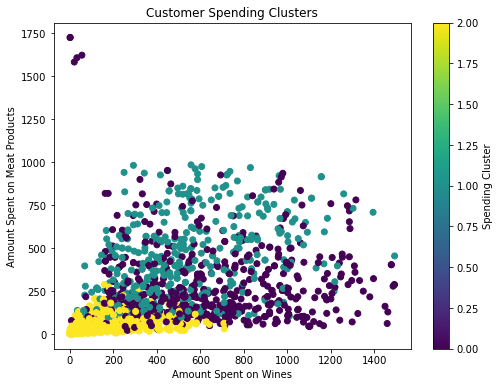

In [68]:
# Plot the spending clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['MntWines'], df['MntMeatProducts'], c=df['Spending_Cluster'])
plt.title('Customer Spending Clusters')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Amount Spent on Meat Products')
plt.colorbar(label='Spending Cluster')
plt.show()

### Based on the clustering analysis, initial conclude the following marketing strategies for each customer segment:

#### Spending Cluster 0 - These customers have a medium income and spend the most on wines and a medium amount on other products. They also have the fewest children at home.

Strategy: Since these customers have a preference for wines, we can target them with promotions and discounts on premium wines. We can also recommend wine-related products or events, such as wine tasting events or wine and dine offers. Since they have fewer children at home, they might also be interested in products or services that are more suited for adults or couples.

#### Spending Cluster 1 - These customers have the highest income and spend a medium amount on wines but the most on other products. They also have the fewest children at home.

Strategy: These customers have the financial capacity to spend more, so we can target them with premium products across different categories. Since they spend the most on other products, we can also offer them bundled products or cross-category discounts. For example, we can offer a discount on meat products when they purchase a certain amount of wines.

#### Spending Cluster 2 - These customers have the lowest income and spend the least on all products. They also have the most children at home.

Strategy: These customers might be more price-sensitive, so we can target them with discounts, promotions, and value-for-money deals. Since they have more children at home, we can also offer them family-friendly products or services. For example, we can offer a discount on children's products when they purchase a certain amount of groceries.

In [69]:
#now that the customers are segmented
#Here are the customer IDs for each spending cluster:

# Create a list of customer IDs for each cluster
cluster_ids = df.groupby('Spending_Cluster')['ID'].apply(list)

# Print the list of customer IDs for each cluster
for cluster, ids in cluster_ids.items():
    print(f'Cluster {cluster}: {ids}')

Cluster 0: [4141, 7446, 965, 2114, 6565, 5376, 1993, 4339, 2968, 6566, 9381, 6853, 1012, 9369, 4477, 1357, 535, 8996, 5798, 4646, 9370, 8908, 5077, 7431, 999, 9805, 7215, 1491, 8026, 9597, 1295, 1685, 11084, 8690, 2937, 9701, 9949, 7055, 10240, 9260, 10095, 8475, 8717, 6935, 10562, 3934, 6999, 8727, 380, 6521, 6274, 454, 2075, 7079, 7375, 709, 3233, 6439, 2176, 9265, 10992, 309, 1184, 3762, 4391, 10144, 2926, 7119, 3924, 6963, 6320, 2863, 1802, 9750, 7214, 10675, 9560, 9707, 2579, 9185, 11056, 9365, 6142, 10704, 5125, 2928, 1245, 1729, 6202, 9799, 7683, 3428, 7030, 3523, 7106, 5067, 1361, 6932, 8746, 3725, 4324, 6694, 9699, 2276, 2807, 6233, 1992, 2416, 7999, 3916, 564, 178, 10581, 9286, 5172, 5562, 9426, 11088, 716, 466, 5140, 4945, 8939, 203, 4607, 2532, 4943, 4322, 702, 5547, 7822, 3174, 9780, 9120, 2574, 9058, 5057, 2453, 7972, 988, 10299, 10972, 6583, 10727, 9624, 6945, 1907, 701, 3856, 4149, 2131, 2942, 1173, 4679, 10928, 6661, 9153, 10379, 2920, 4673, 9937, 9596, 2891, 6327, 101